# Pandas

One of the best options for working with data in Python is to use the [Python Data Analysis Library](http://pandas.pydata.org/) (popularly called Pandas). The Pandas library provides data structures, produces high-quality plots with matplotlib and integrates nicely with other libraries that use NumPy.

For this lesson we will use public data from the [ Portal Project Teaching Database](https://figshare.com/articles/Portal_Project_Teaching_Database/1314459). The subset comes from Ernst *et al.* [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA](http://www.esapubs.org/archive/ecol/E090/118/default.htm)

This section will use the **surveys.csv** file that it is already in this directory. It was downloaded from this [link](https://ndownloader.figshare.com/files/2292172). Note: *csv* stands  for comma separated values.  

The csv file contains the data of the study of species and weight of animals caught in plots in the study area mentioned above. Each row holds information for a single animal, and the columns represent:

|**Column**|   **Description**|
|:--------:|:-----------:|
|record_id|	Unique id for the observation|
|month|	month of observation|
|day|	day of observation|
|year|	year of observation|
|plot_id|	ID of a particular plot|
|species_id|	2-letter code|
|sex|	sex of animal ("M", "F")|
|hindfoot_length|	length of the hindfoot in mm|
|weight|	weight of the animal in grams|

First let's import pandas

In [1]:
# import numpy
import numpy as np
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
# Make figures appear in-line within the notebook
%matplotlib inline

/Users/starignus/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Reading CSV Data Using Pandas

Pandas has a function to read csv formated files ```read.csv()``` that pulls the file directly into a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe). 

A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values, factors and more) in columns. It is similar to a spreadsheet or an SQL table or the data.frame in R. A DataFrame always has an index (0-based). An index refers to the position of an element in the data structure as we already seen during the lectures.

<img src="DF.png" alt="jupyter" style="width: 500px;"/>

In [2]:
# Assign in a variable a Data Frame
df_survey = pd.read_csv("surveys.csv")

In [3]:
type(df_survey)

pandas.core.frame.DataFrame

In [4]:
# Use the head() method to exlpore the first rows 
df_survey.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [5]:
df_survey.head(n=2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN


## Manipulating data
First we will check the data type of the data stored with the ```type``` method and the type of the items in each column with the fucntion ```dtypes```.

In [6]:
# We will get the type of object of the varialbe 
type(df_survey)

pandas.core.frame.DataFrame

In [7]:
# Let's check the type of the elements in the Data Frame (DF)
df_survey.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

There are other ways to visualise objects in the Data Frame. We already seen head(), but there are some other that are usefull when exploring our data.

In [8]:
# .columns provides the an index of all of the column names in DF. They are return in a unicode format
df_survey.columns

Index([u'record_id', u'month', u'day', u'year', u'plot_id', u'species_id',
       u'sex', u'hindfoot_length', u'weight'],
      dtype='object')

In [9]:
# WE can see the end of the DF with .tail()
df_survey.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


In [10]:
df_survey.tail(n=2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


We will perform some quick summary statistics to learn more about the data that we're working with. We might want to know how many animals were collected in each plot, or how many of each species were caught. We can perform summary stats quickly using groups. But first we need to figure out what we want to group by

In [11]:
# Exploring the data
df_survey.columns.values

array(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'], dtype=object)

In [12]:
# Let's get a list of all the species. The pd.unique function tells us all of the unique values 
# in the species_id column.
pd.unique(df_survey['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [13]:
# Let's get a list of all the species. The pd.unique function tells us all of the unique 
# values in the species_id column.
specie_id = pd.unique(df_survey['species_id'])

In [14]:
specie_id

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [16]:
## To filter the nan values
specie_id[pd.notnull(specie_id)]
len(specie_id[pd.notnull(specie_id)])

48

### Challenge
* Create a list of unique plot ID's found in the surveys data. Call it plot_names. How many unique plots are there in the data? How many unique species are in the data?

In [ ]:
plot_names =

## Groups in Pandas
We can get a summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to calculate the average weight of all individuals per plot.

We can calculate basic statistics for all records in a single column:

In [17]:
df_survey['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

Also, it is possible to get the individual metrics

In [18]:
df_survey['weight'].min()

4.0

In [19]:
df_survey['weight'].max()

280.0

In [20]:
df_survey['weight'].mean()

42.672428212991356

In [21]:
df_survey['weight'].std()

36.63125947458399

In [22]:
df_survey['weight'].count()

32283

In case we want to get a summary statistics by one or more variables we can use ```.groupby()``` method. This grouped variable is now a *GroupBy object*. It has not computed anything yet except for some intermediate data about the group key df['key1']. The idea is that **this object has all of the information needed to apply some operation to each of the groups**.

In [23]:
group_by_sex = df_survey.groupby('sex')

In [24]:
type(group_by_sex)

pandas.core.groupby.DataFrameGroupBy

Pandas' ```describe()``` method will only return summary values for columns containing numeric data.

In [25]:
# summary statistics for all numeric columns by sex
group_by_sex.describe()

day  hindfoot_length         month       plot_id  \
sex                                                                    
F   count  15690.000000     14894.000000  15690.000000  15690.000000   
    mean      16.007138        28.836780      6.583047     11.440854   
    std        8.271144         9.463789      3.367350      6.870684   
    min        1.000000         7.000000      1.000000      1.000000   
    25%        9.000000        21.000000      4.000000      5.000000   
    50%       16.000000        27.000000      7.000000     12.000000   
    75%       23.000000        36.000000     10.000000     17.000000   
    max       31.000000        64.000000     12.000000     24.000000   
M   count  17348.000000     16476.000000  17348.000000  17348.000000   
    mean      16.184286        29.709578      6.392668     11.098282   
    std        8.199274         9.629246      3.420806      6.728713   
    min        1.000000         2.000000      1.000000      1.000000   
    25%        9.000000        21.000000      3.000000      5.000000   
    50%       16.000000        34.000000      6.000000     11.000000   
    75%       23.000000        36.000000      9.000000     17.000000   
    max       31.000000        58.000000     12.000000     24.000000   

              record_id        weight          year  
sex                                                  
F   count  15690.000000  15303.000000  15690.000000  
    mean   18036.412046     42.170555   1990.644997  
    std    10423.089000     36.847958      7.598725  
    min        3.000000      4.000000   1977.000000  
    25%     8917.500000     20.000000   1984.000000  
    50%    18075.500000     34.000000   1990.000000  
    75%    27250.000000     46.000000   1997.000000  
    max    35547.000000    274.000000   2002.000000  
M   count  17348.000000  16879.000000  17348.000000  
    mean   17754.835601     42.995379   1990.480401  
    std    10132.203323     36.184981      7.403655  
    min        1.000000      4.000000   1977.000000  
    25%     8969.750000     20.000000   1984.000000  
    50%    17727.500000     39.000000   1990.000000  
    75%    26454.250000     49.000000   1997.000000  
    max    35548.000000    280.000000   2002.000000

In [26]:
df_survey.head(2)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN


In [27]:
# provide the mean for each numeric column by sex
group_by_sex.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


In [28]:
group_by_sex.count()

,record_id,month,day,year,plot_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


## Challenge 

* How many specimens are female F and how many male M?
* What happens when you group by two columns and then grab mean values:

  * ``` grop_by_sex_plot = df_survey.groupby(['plot_id','sex'])```
  * ``` grop_by_sex_plot.mean()```
  
* Summarize weight values for each plot id in your data. A hint is to use something like:
  ```grop_by_plot['weight'].describe()```

You should get something like:
```
plot_id       
1        count    1903.000000
         mean       51.822911
         std        38.176670
         min         4.000000
         25%        30.000000
         50%        44.000000
         75%        53.000000
         max       231.000000
```

In [29]:
grop_by_sex_plot = df_survey.groupby(['plot_id','sex'])

In [30]:
grop_by_sex_plot.mean()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [31]:
grop_by_plot = df_survey.groupby('plot_id')

In [32]:
grop_by_plot['weight'].describe()

plot_id       
1        count    1903.000000
         mean       51.822911
         std        38.176670
         min         4.000000
         25%        30.000000
         50%        44.000000
         75%        53.000000
         max       231.000000
2        count    2074.000000
         mean       52.251688
         std        46.503602
         min         5.000000
         25%        24.000000
         50%        41.000000
         75%        50.000000
         max       278.000000
3        count    1710.000000
         mean       32.654386
         std        35.641630
         min         4.000000
         25%        14.000000
         50%        23.000000
         75%        36.000000
         max       250.000000
4        count    1866.000000
         mean       47.928189
         std        32.886598
         min         4.000000
         25%        30.000000
         50%        43.000000
                     ...     
21       std        21.199819
         min         4.00

### Summary counts and  basic math operations
If we want to count the number of *samples* by *species* we can do it in different ways using the ```groupby()``` combined with ```count()```.

In [33]:
df_survey.head(3)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


In [34]:
# We can slice the groupby object
count_species = df_survey.groupby('species_id')['plot_id'].count()

In [35]:
count_species

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: plot_id, dtype: int64

In [36]:
# We can also selsect an specific splecie "AB"
df_survey.groupby('species_id')['plot_id'].count()['AB']

303

We can carry out a mathematical operation on an entire column: weight * 2.
We could use this to normalise data according to the mean, area, or other property calculated from our data.

In [37]:
df_survey['weight'] * 2

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
35519     72.0
35520     96.0
35521     90.0
35522     88.0
35523     54.0
35524     52.0
35525     48.0
35526     86.0
35527      NaN
35528     50.0
35529      NaN
35530      NaN
35531     86.0
35532     96.0
35533    112.0
35534    106.0
35535     84.0
35536     92.0
35537     62.0
35538    136.0
35539     46.0
35540     62.0
35541     58.0
35542     68.0
35543      NaN
35544      NaN
35545      NaN
35546     28.0
35547    102.0
35548      NaN
Name: weight, dtype: float64

## Quick Plotting with Pandas

One thing that we can do and is really useful, it is to plot our summary statisitcs. Therefore, we will use Pandas' ```plot()``` [method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html). 

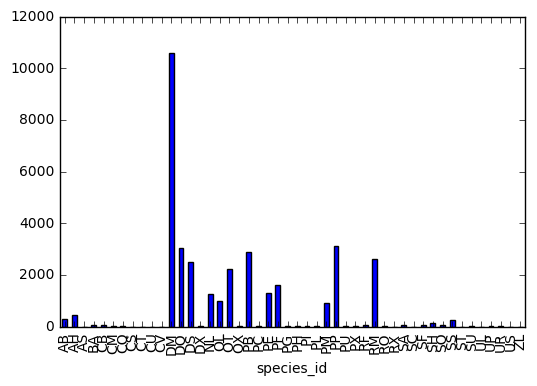

In [38]:
# Creating a bar chart of specimens by specie
count_species.plot(kind='bar')

In [39]:
# How many specimens where captured in each plot (how many unique record correspond to each plot and count)
total_specimens = df_survey['record_id'].groupby(df_survey['plot_id']).nunique()

In [40]:
total_specimens

plot_id
1     1995
2     2194
3     1828
4     1969
5     1194
6     1582
7      816
8     1891
9     1936
10     469
11    1918
12    2365
13    1538
14    1885
15    1069
16     646
17    2039
18    1445
19    1189
20    1390
21    1173
22    1399
23     571
24    1048
Name: record_id, dtype: int64

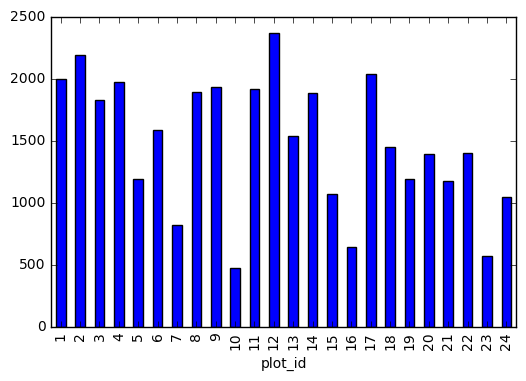

In [41]:
total_specimens.plot(kind='bar')

Now let's create:
* Create a plot of average weight across all species per plot.
* Create a plot of total males versus total females for the entire dataset.

In [42]:
by_plot = df_survey.groupby('plot_id')

In [43]:
by_plot_weight = by_plot['weight'].mean()

In [44]:
by_plot_weight

plot_id
1     51.822911
2     52.251688
3     32.654386
4     47.928189
5     40.947802
6     36.738893
7     20.663009
8     47.758001
9     51.432358
10    18.541219
11    43.451757
12    49.496169
13    40.445660
14    46.277199
15    27.042578
16    24.585417
17    47.889593
18    40.005922
19    21.105166
20    48.665303
21    24.627794
22    54.146379
23    19.634146
24    43.679167
Name: weight, dtype: float64

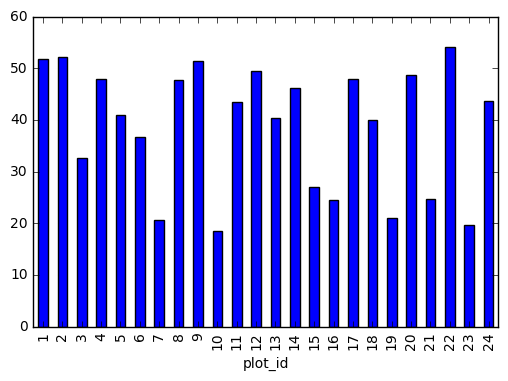

In [45]:
by_plot_weight.plot(kind='bar')

First we group data by plot and by sex, and then calculate a total weigth for each plot.

In [46]:
by_plot_sex = df_survey.groupby(['plot_id','sex'])

In [52]:
by_plot_sex.mean()

record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1       F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2       F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3       F    19888.783875  6.604703  16.161254  1992.013438        23.774044   
        M    20226.767857  6.271429  16.450000  1992.275000        23.833744   
4       F    17489.205275  6.442661  15.746560  1990.235092        33.249102   
        M    18493.841748  6.430097  16.507767  1991.000971        34.097959   
5       F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6       F    19406.503392  6.628223  16.313433  1991.579376        26.981322   
        M    17849.574607  6.035340  16.091623  1990.556283        27.425591   
7       F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8       F    18920.276190  6.632143  15.836905  1991.267857        32.187578   
        M    19452.109868  6.571719  15.854527  1991.686673        33.751059   
9       F    16217.497069  6.499414  15.555686  1989.303634        35.126092   
        M    18000.710159  6.361554  15.209163  1990.632470        34.175732   
10      F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11      F    16994.962287  6.759124  16.283455  1989.836983        32.029299   
        M    16933.909621  6.374150  15.974733  1989.856171        32.078014   
12      F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13      F    18033.100318  6.802548  16.229299  1990.619427        27.201014   
        M    16969.044700  6.480204  16.005109  1989.911877        27.893793   
14      F    17097.145275  6.510578  16.681241  1989.974612        32.973373   
        M    17891.948598  6.660748  16.504673  1990.587850        32.961802   
15      F    20602.449064  6.569647  16.162162  1992.523909        21.949891   
        M    18104.019560  6.185819  17.413203  1990.770171        21.803109   
16      F    19002.445946  6.360360  16.819820  1991.351351        23.144928   
        M    18434.714286  6.201465  16.622711  1990.926740        23.480916   
17      F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18      F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19      F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20      F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21      F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22      F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23      F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24      F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [53]:
# Sum weigth
plot_sex_sum_weight = by_plot_sex['weight'].sum()

In [54]:
plot_sex_count_weight.sum()

NameError: name 'plot_sex_count_weight' is not defined

We will use the ```unstack()``` method on our grouped data to figure out the total weight that each sex contributed to each plot.

In [55]:
plot_sex_sum_weight.unstack()

sex,F,M
plot_id,,
1,38253.0,59979.0
2,50144.0,57250.0
3,27251.0,28253.0
4,39796.0,49377.0
5,21143.0,23326.0
6,26210.0,27245.0
7,6522.0,6422.0
8,37274.0,47755.0
9,44128.0,48727.0


Now let's plot a ed bar plot with the weights for each sex stacked by plot_id.

In [56]:
# Asigning to a variabl our DF
weight_sex_plot_id = plot_sex_sum_weight.unstack()

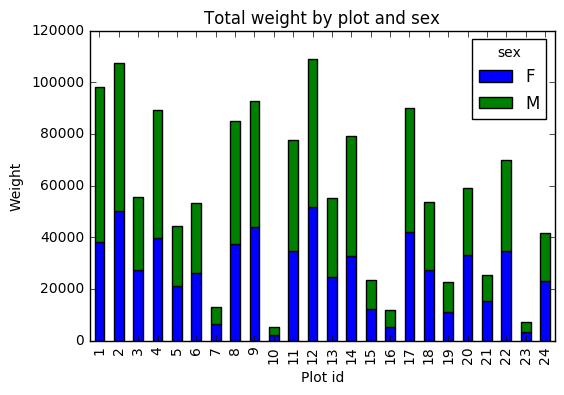

In [57]:
# ploting 
wsp = weight_sex_plot_id.plot(kind='bar',stacked=True,title="Total weight by plot and sex")
wsp.set_ylabel("Weight")
wsp.set_xlabel("Plot id")

Resources
* [Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html)
* http://stackoverflow.com/